In [1]:
import pandas as pd
import numpy as np
import re
import os
import sys
sys.path.append("/home/ziryu_wang/.conda/envs/py36_cmap/lib/python3.6/site-packages")
#sys.path
from cmapPy.pandasGEXpress.parse import parse
import cmapPy.pandasGEXpress.subset_gctoo as sg

Celine = pd.read_csv('/home/ziryu_wang/database/cMAP/cellinfo_beta.txt',sep = '\t')
my_col_metadata = parse("/home/ziryu_wang/database/cMAP/level5_beta_trt_cp_n720216x12328.gctx", col_meta_only=True)
sigInfo = pd.read_csv('/home/ziryu_wang/database/cMAP/siginfo_beta.txt',sep='\t')
print(pd.value_counts(Celine['primary_disease']))

# Mapping TCGA acronyms to the dataset's primary disease entries
tcga_mapping = {
    "BLCA": "bladder cancer",
    "BRCA": "breast cancer",
    "COAD": "colon cancer",
    "HNSC": "head and neck cancer",
    "KIRC": "kidney cancer",
    "LIHC": "liver cancer",
    "LUAD": "lung cancer",
    "PRAD": "prostate cancer"
}

# Creating a DataFrame with this mapping
df_mapping = pd.DataFrame(list(tcga_mapping.items()), columns=['TCGA_Acronym', 'Primary_Disease'])

print(df_mapping)

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,3,4,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


unknown                      82
lung cancer                  28
colon cancer                 19
ovarian cancer               14
endometrial cancer           10
leukemia                     10
lymphoma                     10
breast cancer                10
skin cancer                   9
prostate cancer               6
bladder cancer                5
brain cancer                  4
liver cancer                  4
normal lung sample            4
bone cancer                   4
gastric cancer                3
normal kidney sample          3
neuroblastoma                 2
myeloma                       2
kidney cancer                 2
normal stem cell sample       2
normal soft tissue sample     2
normal blood sample           1
pancreatic cancer             1
cervical cancer               1
embryonal cancer              1
head and neck cancer          1
Name: primary_disease, dtype: int64
  TCGA_Acronym       Primary_Disease
0         BLCA        bladder cancer
1         BRCA         bre

Processing BLCA bladder cancer...
dpG number: 482
unG number: 113
CAL29     2079
BC3C      1936
5637        12
VMCUB1      12
J82         12
Name: cell_iname, dtype: int64
No. of perturbations: 29
No. of drugs for BLCA: 26


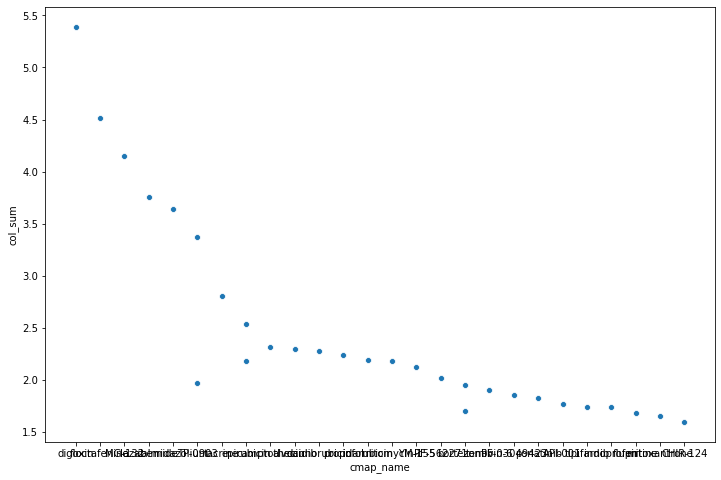

Processing BRCA breast cancer...
dpG number: 54
unG number: 19
MCF7        63523
MCF10A      28420
MDAMB231    18629
SKBR3        2862
BT20         2806
HS578T       2800
T47D         2121
MDAMB468     2115
BT474         375
ZR751         363
Name: cell_iname, dtype: int64
No. of perturbations: 664
No. of drugs for BRCA: 213


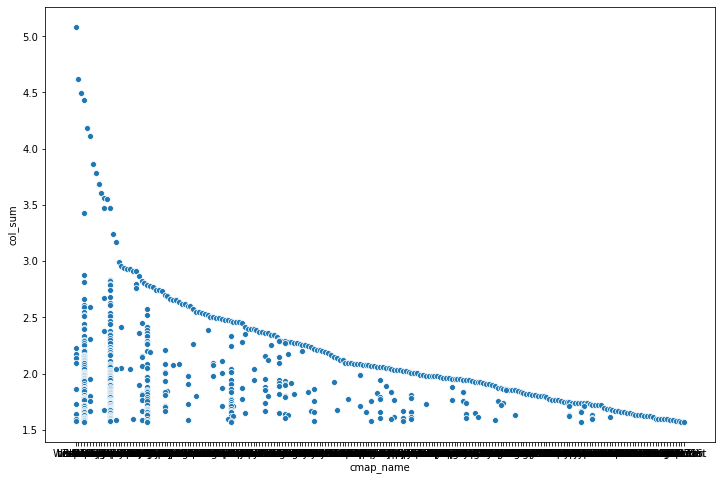

Processing COAD colon cancer...
dpG number: 792
unG number: 83
HT29       43095
SNU407      2161
HCT116      1478
NCIH508      420
SNU1040      373
SW480        363
SW620        362
RKO          362
SNUC4        362
LOVO         360
SW948        359
MDST8        358
CL34         356
HT115        355
SNUC5        351
GP2D         347
CW2           12
Name: cell_iname, dtype: int64
No. of perturbations: 301
No. of drugs for COAD: 188


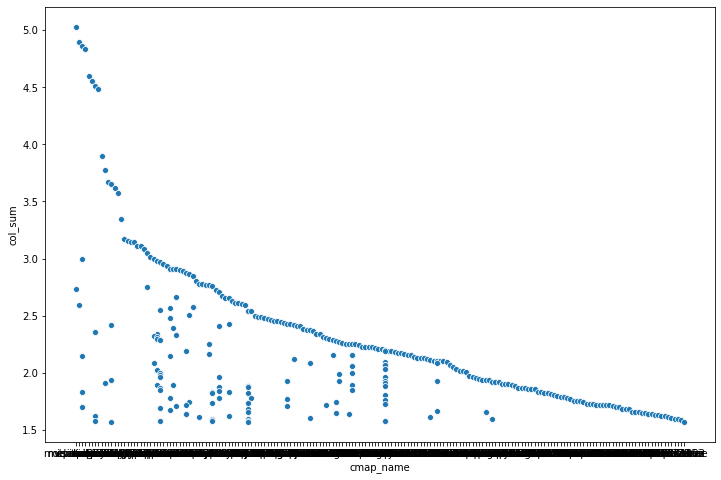

Processing HNSC head and neck cancer...
dpG number: 31
unG number: 10
BICR6    350
Name: cell_iname, dtype: int64
No. of perturbations: 24
No. of drugs for HNSC: 19


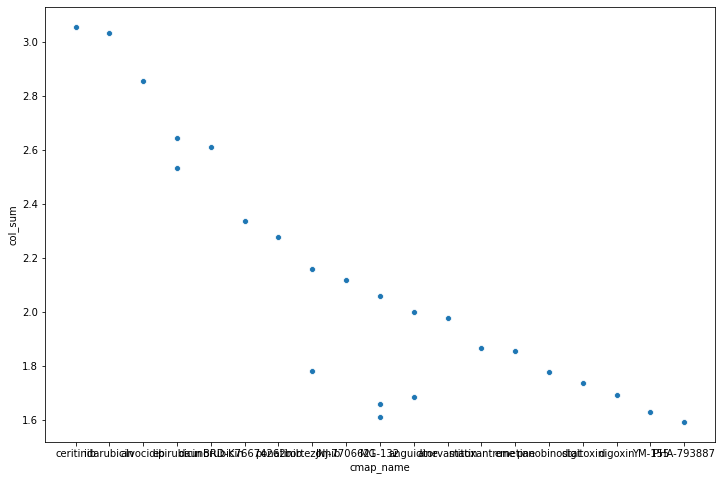

Processing KIRC kidney cancer...
dpG number: 12
unG number: 0
G401        352
RCC10RGB    351
Name: cell_iname, dtype: int64
No. of perturbations: 14
No. of drugs for KIRC: 13


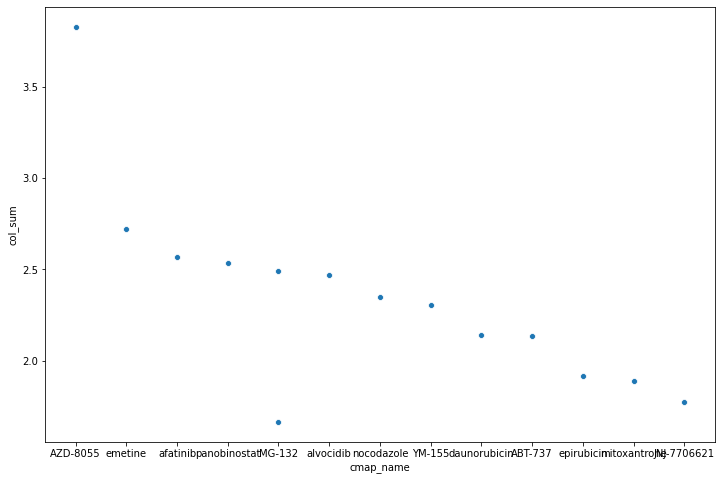

Processing LIHC liver cancer...
dpG number: 116
unG number: 153
HEPG2    18157
JHH5      2152
HUH7      1206
JHH7       363
Name: cell_iname, dtype: int64
No. of perturbations: 50
No. of drugs for LIHC: 39


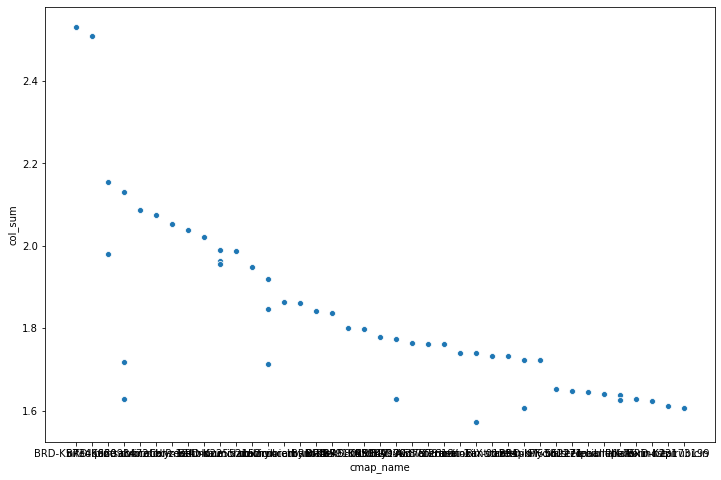

Processing LUAD lung cancer...
dpG number: 312
unG number: 8
A549        53827
HCC515      16133
NCIH1573     2164
HCC95        2132
BEN          2068
NCIH838      1978
NCIH2110     1932
NCIH596       421
NCIH2073      421
DV90          370
CORL23        364
HCC15         361
H1299         360
NCIH2172      356
NCIH1694      355
SKLU1         355
T3M10         353
NCIH1836      351
NCIH841       347
HCC1588       338
NCIH1437      330
H1975          60
NCIH1975       60
NCIH1563       12
NCIH1781       12
HCC827         12
Name: cell_iname, dtype: int64
No. of perturbations: 806
No. of drugs for LUAD: 379


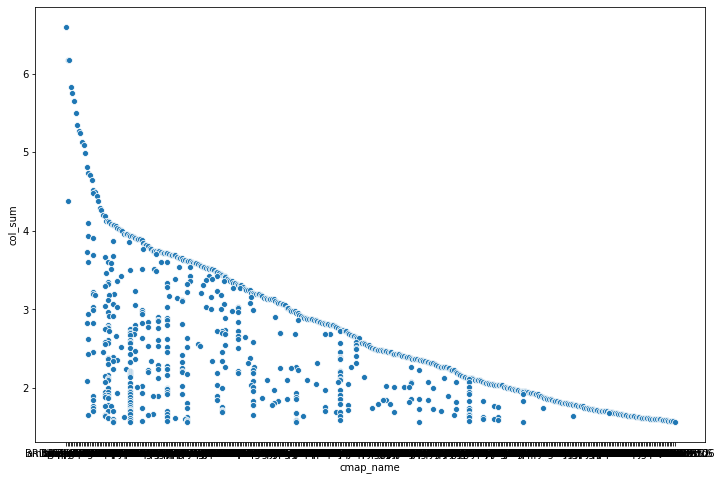

Processing PRAD prostate cancer...
dpG number: 50
unG number: 4
PC3      55253
VCAP     35442
22RV1     2145
LNCAP     1094
DU145       24
Name: cell_iname, dtype: int64
No. of perturbations: 211
No. of drugs for PRAD: 127


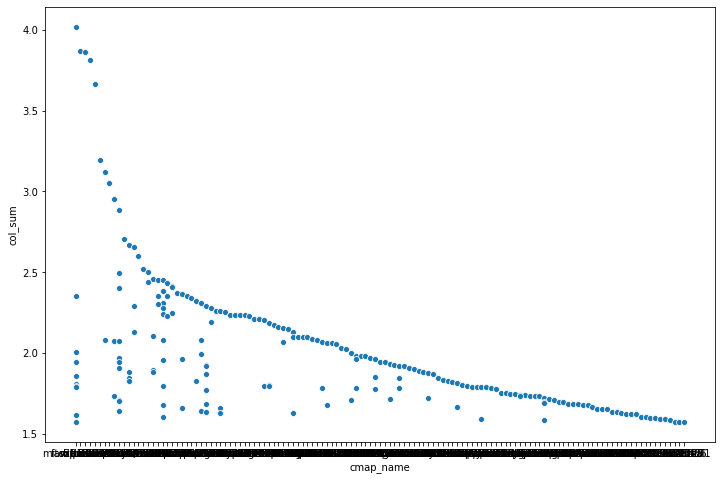

In [42]:
# Assuming sigInfo and my_col_metadata are predefined DataFrames
for index, row in df_mapping.iterrows():
    cancertype = row['TCGA_Acronym']
    celltype = row['Primary_Disease']
    # Filter the Celine DataFrame for rows where primary_disease matches celltype
    coloncl = Celine[Celine['primary_disease'] == celltype]
    
    print(f"Processing {cancertype} {celltype}...")

    # Define the path to the gene data based on the cancer type (TCGA acronym)
    path_geneG1 = f'/home/ziryu_wang/code_ava/step3-cmapPy4_DurgIdent/{cancertype}_dpGenes1.csv'
    path_geneG4 = f'/home/ziryu_wang/code_ava/step3-cmapPy4_DurgIdent/{cancertype}_unGenes4.csv'

    # Load gene data from the specified paths
    geneG1 = pd.read_csv(path_geneG1)
    print(f'dpG number: {geneG1.shape[0]}')
    geneG1id = geneG1["gene_id"].astype(str)

    geneG4 = pd.read_csv(path_geneG4)
    print(f'unG number: {geneG4.shape[0]}')
    geneG4id = geneG4["gene_id"].astype(str)

    # Filtering based on sig_id
    sigInfo1 = sigInfo.loc[sigInfo['sig_id'].isin(my_col_metadata.index.values)]
    
    # Merging and indexing
    colonCid = coloncl.loc[:,['cell_iname','primary_disease']].merge(sigInfo1)
    colonCid.set_index("sig_id", inplace=True)
    colon_ids = sigInfo1["sig_id"][sigInfo1["cell_iname"].isin(coloncl["cell_iname"])]
    print(pd.value_counts(colonCid.cell_iname))

    # Analysis for G1
    colon_gctooG1 = parse(f"/home/ziryu_wang/database/cMAP/level5_beta_trt_cp_n720216x12328.gctx", cid=colon_ids, rid=geneG1id)
    colon_gctooG1.data_df[colon_gctooG1.data_df <= 1.96] = 0
    df = pd.DataFrame(colon_gctooG1.data_df)
    df.loc["col_sum"] = df.apply(lambda x: x.sum(), axis=0)

    # Analysis for G4
    colon_gctooG4 = parse(f"/home/ziryu_wang/database/cMAP/level5_beta_trt_cp_n720216x12328.gctx", cid=colon_ids, rid=geneG4id)
    colon_gctooG4.data_df[colon_gctooG4.data_df >= -1.96] = 0
    df1 = pd.DataFrame(colon_gctooG4.data_df)
    df1.loc["col_sum"] = df1.apply(lambda x: x.sum(), axis=0)
    selected_cols = df1[df1.loc['col_sum'][df1.loc['col_sum'] != 0].index]

    # Scoring
    datasum = pd.DataFrame((df.loc["col_sum"] - df1.loc["col_sum"]) / (len(df) + len(df1) - 2))
    datasum = datasum.sort_values(by='col_sum', ascending=False)
    datasum['sig_id'] = datasum.index
    drugsum1 = datasum.drop(datasum[(datasum.col_sum < 1.96*0.8)].index.tolist())
    print(f"No. of perturbations: {drugsum1.shape[0]}")

    # Drug identification
    drugsum1 = drugsum1.merge(sigInfo1[['sig_id', 'cmap_name']], on='sig_id')
    print(f"No. of drugs for {cancertype}: {len(pd.value_counts(drugsum1.cmap_name))}")
    drugsum1.to_csv(f'/home/ziryu_wang/code_ava/step3-cmapPy4_DurgIdent/output/{cancertype}_drugsum.csv')
    
    sys.path.append('/usr/local/anaconda3/lib/python3.8/site-packages')
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib
    f, ax = plt.subplots(figsize = (12, 8))
    #sns.set_style('whitegrid')
    ax = sns.scatterplot(data=drugsum1,x=drugsum1.cmap_name,y='col_sum')
    plt.show()

In [21]:
import pandas as pd
from functools import reduce

# Define a function to read CSV files and compute the maximum quantile
def read_and_process(tumor_type):
    # Construct the file path from the tumor type
    file_path = f'/home/ziryu_wang/code_ava/step3-cmapPy4_DurgIdent/output/{tumor_type}_drugsum.csv'
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Calculate the 33rd and 67th percentiles for the 'col_sum' column, grouped by 'cmap_name'
    quantiles = data.groupby('cmap_name')['col_sum'].quantile([0.33, 0.67])
    quantiles = quantiles.unstack()  # Reshape for easier manipulation

    # Select the quantile with the maximum absolute magnitude
    quantiles['max_quantile'] = quantiles.apply(lambda x: x[0.67] if abs(x[0.67]) > abs(x[0.33]) else x[0.33], axis=1)
    
    # Format the DataFrame to have 'cmap_name' and the tumor type as columns
    processed_data = quantiles[['max_quantile']].reset_index()
    processed_data.columns = ['cmap_name', tumor_type.upper()]  # Convert tumor type name to uppercase as the column name
    return processed_data

# List of tumor types
tumor_types = ['BLCA', 'BRCA', 'COAD', 'HNSC', 'KIRC', 'LIHC', 'LUAD', 'PRAD']

# Read and process data for all tumor types
data_list = [read_and_process(tumor_type) for tumor_type in tumor_types]

# Merge all the DataFrame objects using reduce function to combine based on 'cmap_name'
drugCom = reduce(lambda left, right: pd.merge(left, right, on='cmap_name', how='outer'), data_list)

drugCom.set_index('cmap_name', inplace=True)
drugCom['Freq'] = drugCom.apply(lambda x: x.count(), axis=1)
drugCom.sort_values(by='Freq', ascending=False, inplace=True)
# Print the merged DataFrame
print(drugCom)
drugCom.to_csv('/home/ziryu_wang/code_ava/step3-cmapPy4_DurgIdent/output/drugCom.csv')

                    BLCA      BRCA      COAD      HNSC      KIRC      LIHC  \
cmap_name                                                                    
daunorubicin    2.281051  2.099770  1.931876  2.611232  2.140392  1.986307   
alvocidib       2.297996  2.010896  2.324981  2.853702  2.469383  2.086332   
mitoxantrone    1.653242  2.151255  2.047853  1.865695  1.889558  1.683770   
epirubicin      2.424027  1.976844  2.375281  2.606477  1.916642  1.606190   
idarubicin      2.189522  2.282016  2.727305  3.032229       NaN  1.947715   
...                  ...       ...       ...       ...       ...       ...   
hydrocortisone       NaN       NaN  1.855080       NaN       NaN       NaN   
imiloxan             NaN       NaN  2.366645       NaN       NaN       NaN   
imipramine           NaN       NaN  3.143082       NaN       NaN       NaN   
lucitanib            NaN       NaN  3.621118       NaN       NaN       NaN   
tipifarnib-P2        NaN       NaN       NaN       NaN       NaN